# Homework 1

## Lectures 1 and 2

### The Perceptron Learning Algorithm

In this problem, you will create **your own target function** $f$ and data set $\mathcal D$ to see how the **Perceptron Learning Algorithm** works.

Take $d = 2$ so you can visualize the problem, and assume $\mathcal X = [−1, 1] × [−1, 1]$ with **uniform probability** of picking each $x \in \mathcal X$ .

In each run, **choose a random line in the plane as your target function** $f$ (do this by taking two random, uniformly distributed points in $[−1, 1] \times [−1, 1]$ and taking the line passing through them), where one side of the line maps to $+1$ and the other maps to $−1$.

Choose the inputs $x_n$ of the data set as random points (uniformly in $\mathcal X$), and evaluate the target function on each $x_n$ to get the corresponding output $y_n$ .

Now, in each run, use the **Perceptron Learning Algorithm** to find $g$.

Start the **PLA** with the weight vector $\mathbf w$ being all zeros (consider $sign(0) = 0$, so all points are initially misclassified), and **at each iteration** have the algorithm **choose a point randomly** from the set of **misclassified** points.

We are interested in two quantities: the number of iterations that PLA takes to converge to g, and the disagreement between f and g which is $P[f(x) \neq g(x)]$ (the probability that f and g will disagree on their classification of a random point).

You can either calculate this probability exactly, or approximate it by generating a sufficiently large, separate set of points to estimate it.

In order to get a reliable estimate for these two quantities, you should repeat the experiment for 1000 runs (each run as specified above) and take the average over these runs.

In [1]:
N <- 1000
X <- data.frame(
    x_1 = runif(N, min=-1, max=1),
    x_2 = runif(N, min=-1, max=1)
)
head(X)
#plot(X, col='steelblue')

x_1,x_2
-0.9685375,0.11233322
-0.1103750,0.05222111
-0.2999265,0.65547032
-0.9615139,-0.49027585
-0.8639819,0.18070611
0.8594563,-0.43548259


Choose two random points to generate $f$

In [16]:
x_1 = runif(2, min=-1, max=1)
x_2 = runif(2, min=-1, max=1)
line_pts <- data.frame(x_1,x_2)
line_pts

x_1,x_2
"0,6079957","-0,2716928"
"0,8503480","-0,7613900"


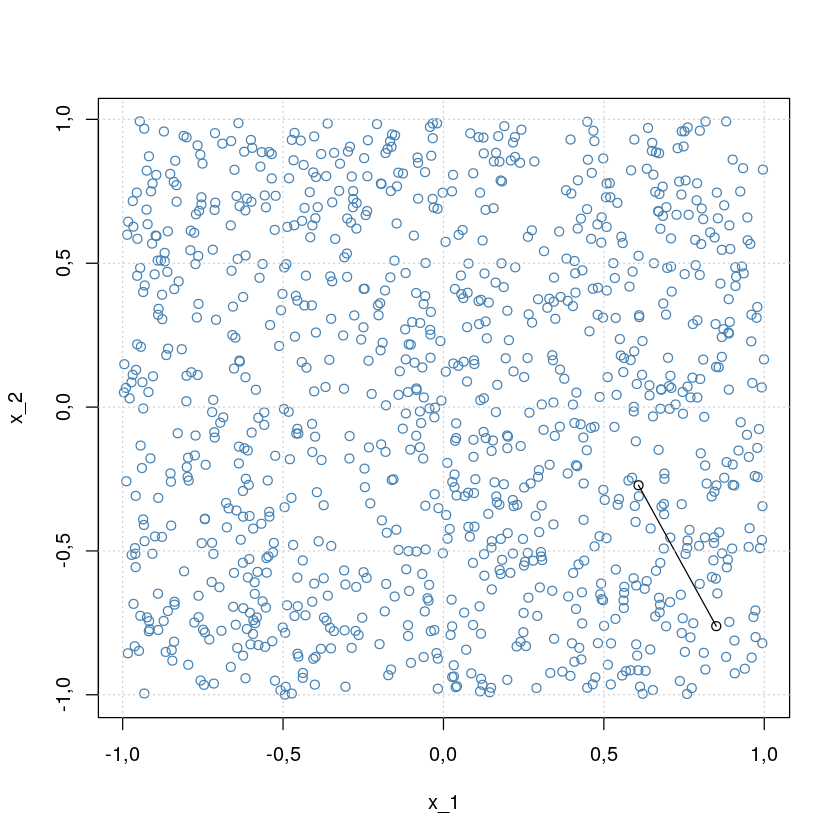

In [17]:
plot(X, col='steelblue')
points(line_pts, col='black')
lines(line_pts, col='black')
grid()

In [18]:
# Renaming for readibility
p1 <- line_pts[1,]
p2 <- line_pts[2,]

# Get deltas for slope
delta_x_1 <- p2[,'x_1'] - p1[,'x_1']
delta_x_2 <- p2[,'x_2'] - p1[,'x_2']

# Get slope and y-intercept
slope <- delta_x_2 / delta_x_1
b <- p1[,'x_2'] - slope * p1[,'x_1']

# Get a sequence of points over the line
# that passes over p1 and p2
line_xs <- seq(-2, 2, 0.1)
line_ys <- slope * line_xs + b

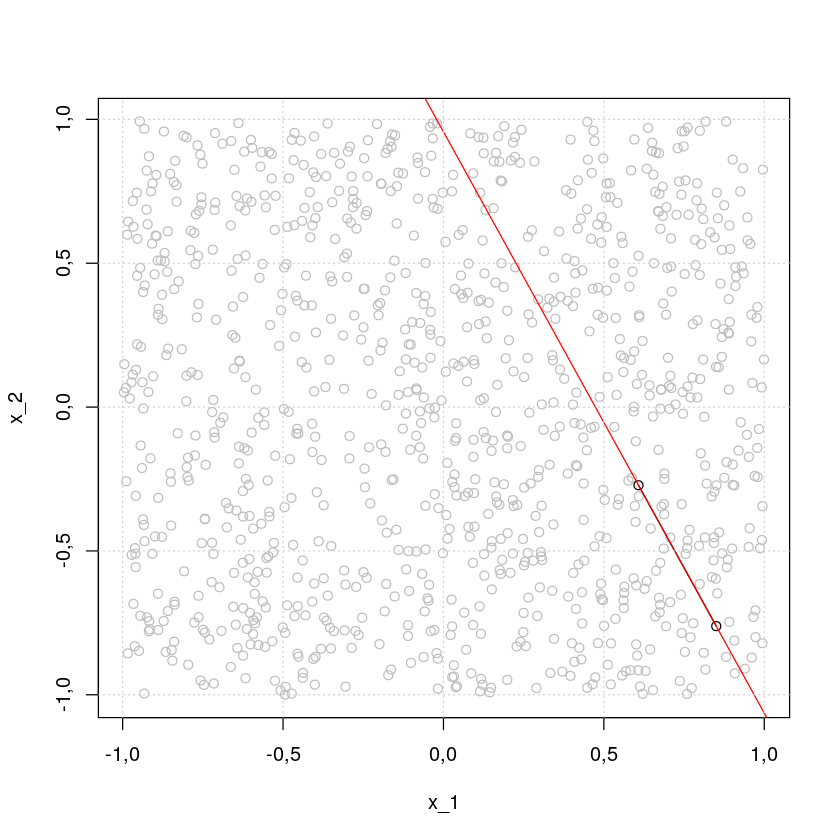

In [19]:
plot(X, col='gray')
points(line_pts, col='black')
lines(line_pts, col='black')
lines(line_xs, line_ys, col='red')
grid()

In [25]:
# Function to classify points into two classes
classify_points <- function(X){
    #line_ys <- slope * line_xs + b
    #class_1_x1 <- c()
    #class_1_x2 <- c()
    #class_2_x1 <- c()
    #class_2_x2 <- c()
    ys <- c()
    for(row in 1:nrow(X))
    {
        line_y <- slope * X[row,'x_1'] + b
        if(line_y > X[row,'x_2'])
        {
            # Below line => class1
            #class_1_x1 <- c(class_1_x1, X[row,'x_1'])
            #class_1_x2 <- c(class_1_x2, X[row,'x_2'])
            ys <- c(ys, -1)
        }
        else
        {
            # Over line => class2
            #class_2_x1 <- c(class_2_x1, X[row,'x_1'])
            #class_2_x2 <- c(class_2_x2, X[row,'x_2'])
            ys <- c(ys, +1)
        }
    }
    #class_1 <- data.frame(x_1=class_1_x1, x_2=class_1_x2)
    #class_2 <- data.frame(x_1=class_2_x1, x_2=class_2_x2)
    #return(list(class_1, class_2))
    data <- cbind(X, ys)
    colnames(data) <- c('x_1','x_2','y')
    return(data)
}

In [29]:
data <- classify_points(X)
head(data)

x_1,x_2,y
"-0,9685375","0,11233322",-1
"-0,1103750","0,05222111",-1
"-0,2999265","0,65547032",-1
"-0,9615139","-0,49027585",-1
"-0,8639819","0,18070611",-1
"0,8594563","-0,43548259",1


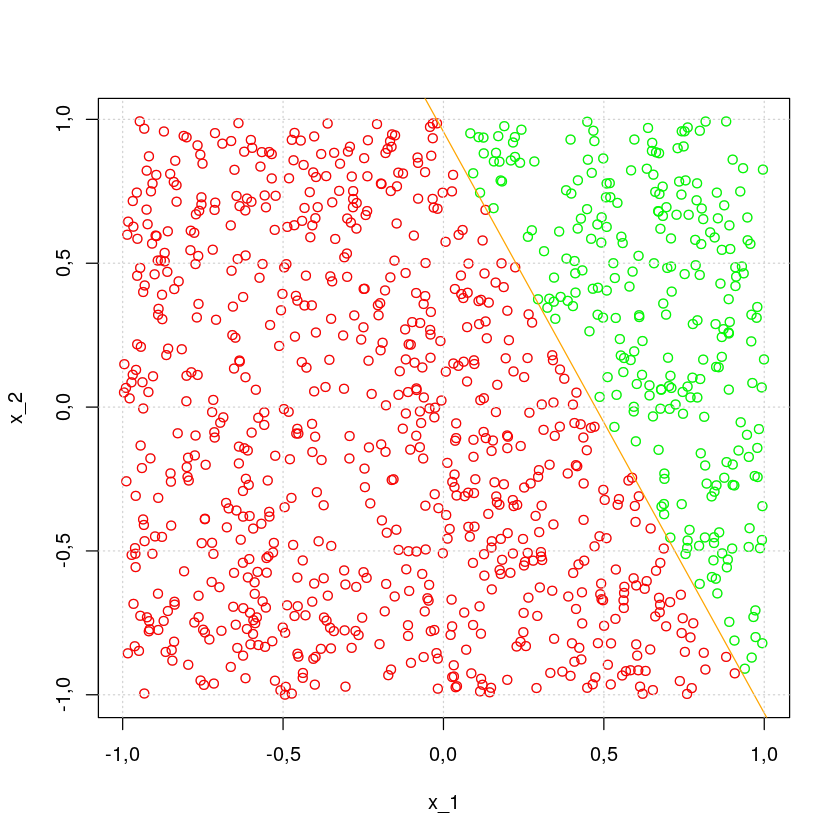

In [48]:
plot(X, col='gray')
points(data[data['y']<0, c('x_1','x_2')], col='red')
points(data[data['y']>0, c('x_1','x_2')], col='green')

#points(line_pts, col='black')
#lines(line_pts, col='black')
lines(line_xs, line_ys, col='orange')
grid()

### The perceptron algorithm

In [525]:
N <- 100
X <- data.frame(
    x_1 = runif(N, min=-1, max=1),
    x_2 = runif(N, min=-1, max=1)
)
head(X)

x_1,x_2
"-0,22079846","-0,05834364"
"0,68072277","-0,76896345"
"0,76785312","-0,03234083"
"0,08425618","-0,21604444"
"0,92978018","-0,80125226"
"0,56647589","-0,18365915"


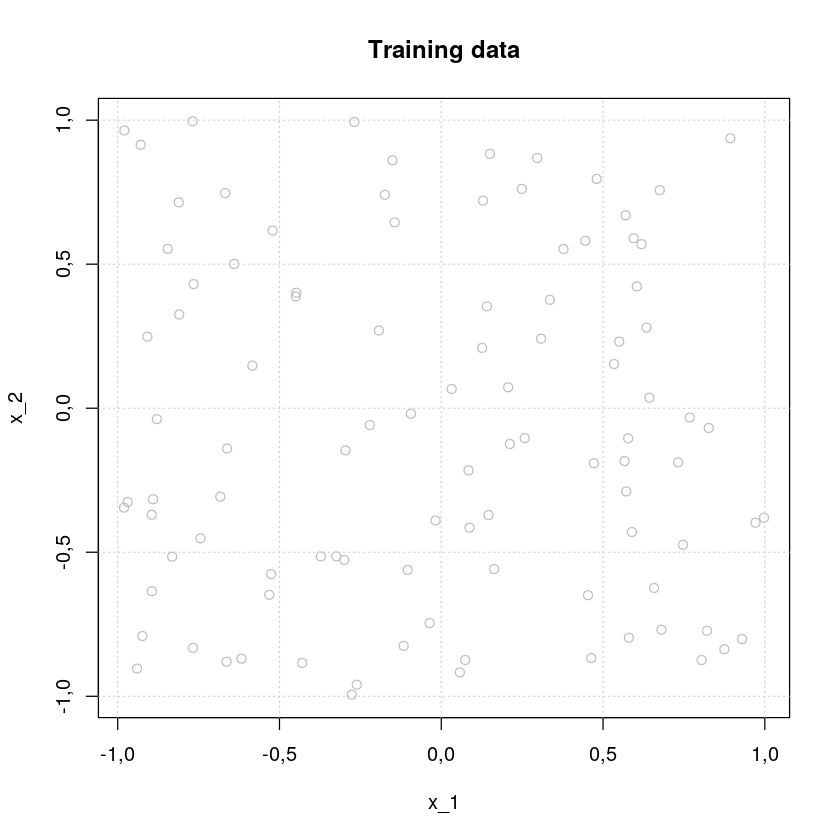

In [526]:
plot(X, col='grey', main='Training data')
grid()

In [527]:
data <- classify_points(X)
head(data)

x_1,x_2,y
"-0,22079846","-0,05834364",-1
"0,68072277","-0,76896345",-1
"0,76785312","-0,03234083",1
"0,08425618","-0,21604444",-1
"0,92978018","-0,80125226",1
"0,56647589","-0,18365915",1


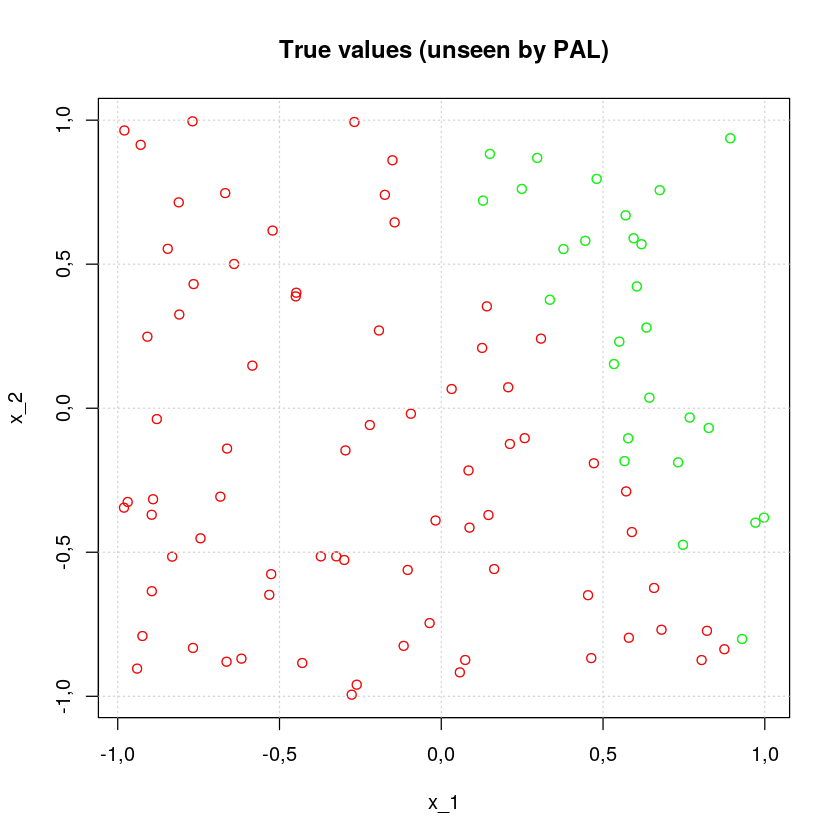

In [528]:
plot(X, col='gray', main='True values (unseen by PAL)')
points(data[data['y']<0, c('x_1','x_2')], col='red')
points(data[data['y']>0, c('x_1','x_2')], col='green')
lines(line_xs, line_ys, col='orange')
grid()

In [529]:
w <- matrix(0, 1, 2+1)

In [530]:
bias <- rep(1, N)
D <- cbind(bias, data[,c('x_1','x_2')])
D <- data.matrix(D)
head(D)

bias,x_1,x_2
1,"-0,22079846","-0,05834364"
1,"0,68072277","-0,76896345"
1,"0,76785312","-0,03234083"
1,"0,08425618","-0,21604444"
1,"0,92978018","-0,80125226"
1,"0,56647589","-0,18365915"


In [531]:
# rowSum(w^T D) to get all predictions at once
#preds <- sign(rowSums(sweep(D, MARGIN=1, t(w), FUN='*')))
preds <- apply(D, 1, function(di, w) {
                         sign(sum(di * w))
                     }, w = w)
head(preds)

[1] 0 0 0 0 0 0

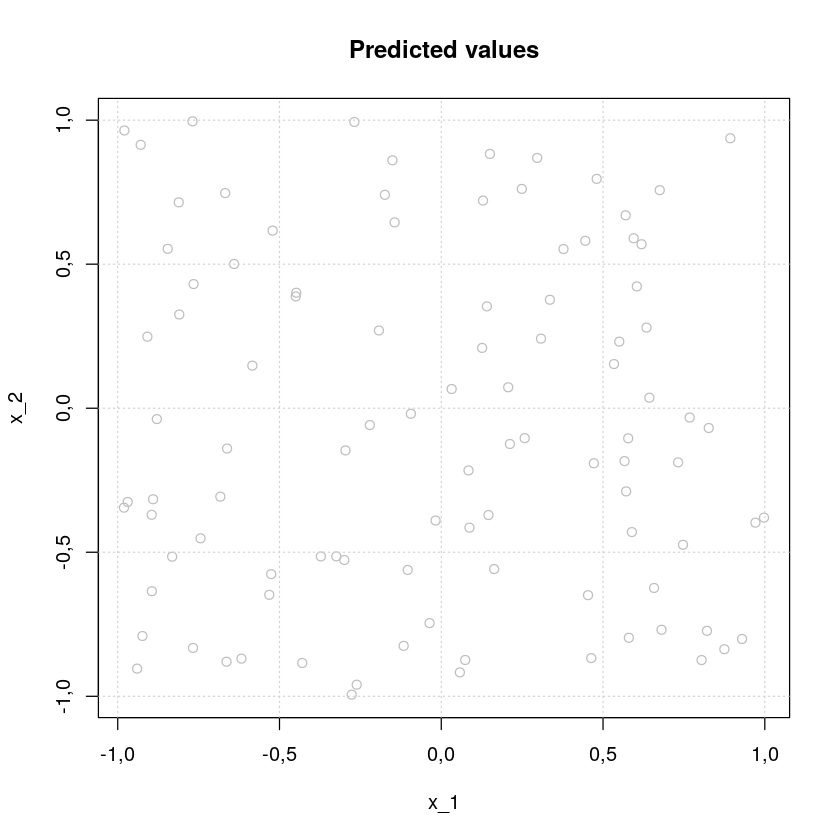

In [532]:
plot(X, col='gray', main='Predicted values')
Xpreds <- cbind(X, preds)
points(Xpreds[Xpreds['preds']<0, c('x_1','x_2')], col='red')
points(Xpreds[Xpreds['preds']>0, c('x_1','x_2')], col='green')
lines(line_xs, line_ys, col='orange')
grid()

In [533]:
preds[1]

[1] 0

In [534]:
done <- FALSE
count <- 0
while(!done){
    count = count + 1
    done <- TRUE
    for(row in 1:nrow(D)){
        y_n <- data[row, 'y']
        if(preds[row] != y_n){
            done <- FALSE
            # Missclassified point, update w
            w <- w + y_n*D[row,]
            #preds <- sign(rowSums(sweep(D, MARGIN=1, t(w), FUN='*')))
            preds <- apply(D, 1, function(di, w) {
                                     sign(sum(di * w))
                                 }, w = w)
            ## Plot EVERY update
            if(FALSE){
                plot(X, col='gray', main='Predicted values')
                Xpreds <- cbind(X, preds)
                points(Xpreds[Xpreds['preds']<0, c('x_1','x_2')], col='red')
                points(Xpreds[Xpreds['preds']>0, c('x_1','x_2')], col='green')
                lines(line_xs, line_ys, col='orange')
                grid()
            }
            
        }
    }
}

In [535]:
w

-3,"6,461209","3,249401"


In [536]:
# Lets predict a grid of points!

In [537]:
xs_grid  <- expand.grid(seq(-1, 1, 0.03), seq(-1, 1, 0.03))
colnames(xs_grid) <- c('x_1','x_2')

xs_grid <- data.frame(rep(1, length(xs_grid[,'x_1'])), xs_grid)
grid_preds <- apply(xs_grid, 1, function(xi, w) {
                         sign(sum(xi * w))
                     }, w = w)
pred_grid <- data.frame(xs_grid, grid_preds)
colnames(pred_grid) <- c('x_0','x_1','x_2', 'pred')
head(pred_grid)

x_0,x_1,x_2,pred
1,"-1,00",-1,-1
1,"-0,97",-1,-1
1,"-0,94",-1,-1
1,"-0,91",-1,-1
1,"-0,88",-1,-1
1,"-0,85",-1,-1


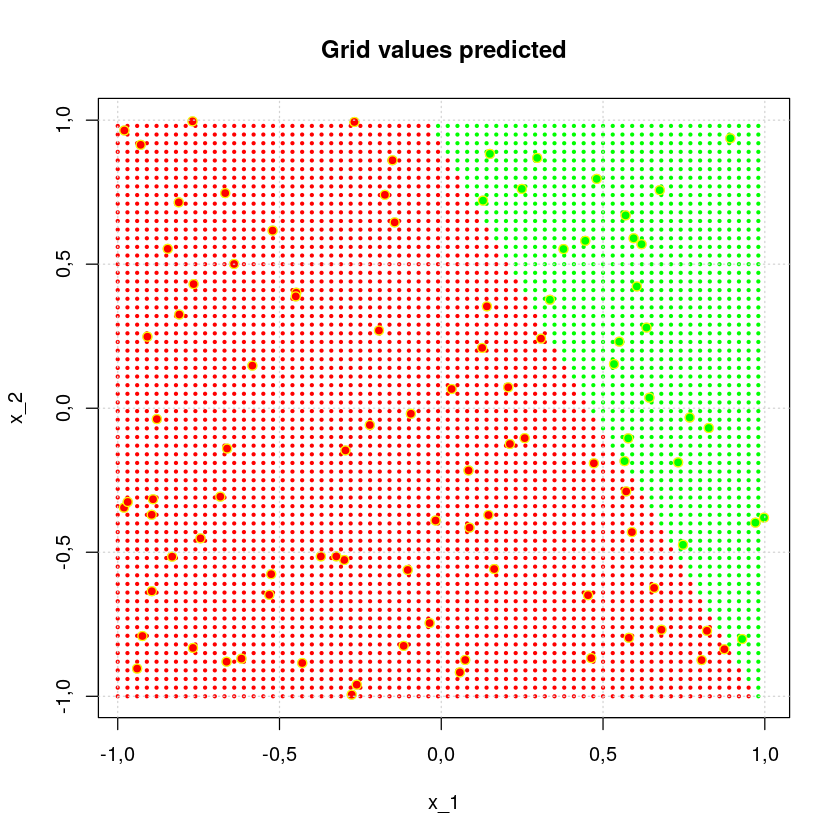

In [538]:
plot(X, col='gray', main='Grid values predicted')
#points(pred_grid[,'x_1'], pred_grid[,'x_2'], pch='*' ,col='orange')
points(pred_grid[pred_grid['pred']<0, c('x_1','x_2')], pch=20, cex=0.5, col='red')
points(pred_grid[pred_grid['pred']>0, c('x_1','x_2')], pch=20, cex=0.5, col='green')
Xpreds <- cbind(X, preds)
points(Xpreds[Xpreds['preds']<0, c('x_1','x_2')], pch=21, col='yellow', bg='red')
points(Xpreds[Xpreds['preds']>0, c('x_1','x_2')], pch=21, col='yellow', bg='green')
#lines(line_xs, line_ys, col='orange')
grid()

In [539]:
# Using objective function to create values of perfect classification
xs_grid  <- expand.grid(seq(-1, 1, 0.03), seq(-1, 1, 0.03))
colnames(xs_grid) <- c('x_1','x_2')
pred_grid <- classify_points(xs_grid)
pred_grid <- data.frame(rep(1, length(pred_grid[,'x_1'])), pred_grid)
colnames(pred_grid) <- c('x_0','x_1','x_2', 'y')
head(pred_grid)

x_0,x_1,x_2,y
1,"-1,00",-1,-1
1,"-0,97",-1,-1
1,"-0,94",-1,-1
1,"-0,91",-1,-1
1,"-0,88",-1,-1
1,"-0,85",-1,-1


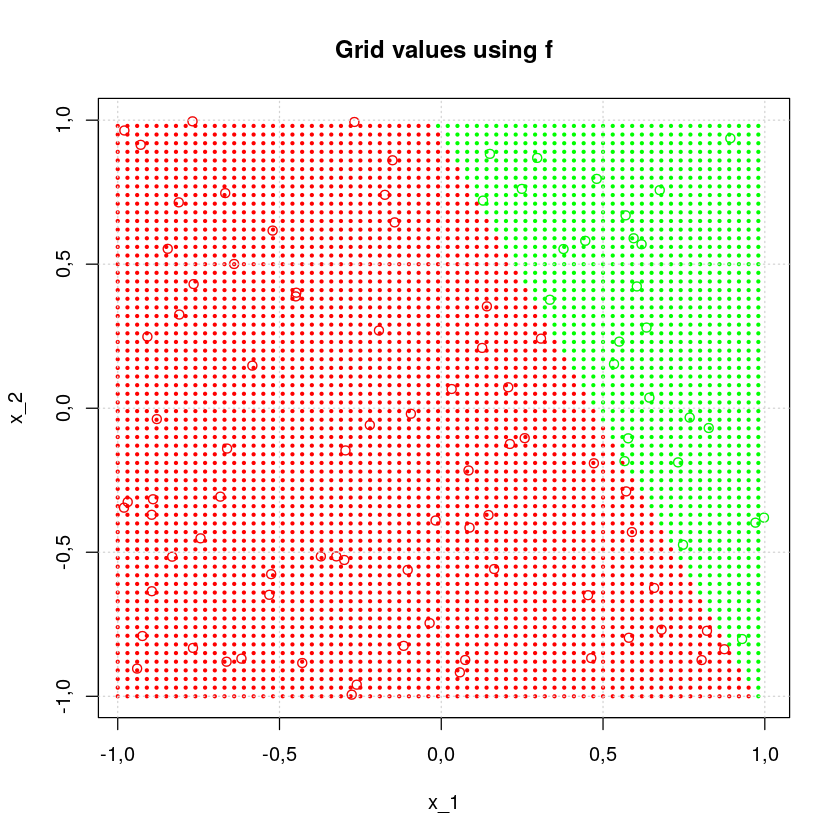

In [540]:
plot(X, col='gray', main='Grid values using f')
#points(pred_grid[,'x_1'], pred_grid[,'x_2'], pch='*' ,col='orange')
points(pred_grid[pred_grid['y']<0, c('x_1','x_2')], pch=20, cex=0.5, col='red')
points(pred_grid[pred_grid['y']>0, c('x_1','x_2')], pch=20, cex=0.5, col='green')
Xpreds <- cbind(X, preds)
points(Xpreds[Xpreds['preds']<0, c('x_1','x_2')], col='red')
points(Xpreds[Xpreds['preds']>0, c('x_1','x_2')], col='green')
#lines(line_xs, line_ys, col='orange')

grid()

In [541]:
count

[1] 10

In [542]:
w

-3,"6,461209","3,249401"


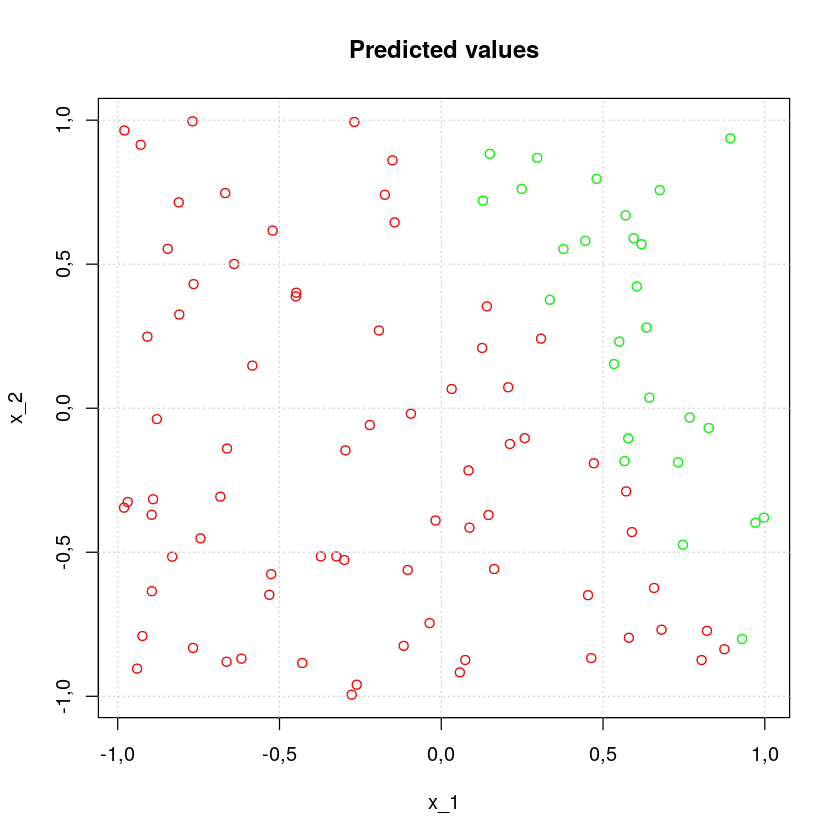

In [543]:
plot(X, col='gray', main='Predicted values')
Xpreds <- cbind(X, preds)
points(Xpreds[Xpreds['preds']<0, c('x_1','x_2')], col='red')
points(Xpreds[Xpreds['preds']>0, c('x_1','x_2')], col='green')
lines(line_xs, line_ys, col='orange')
grid()